In [1]:
%pylab inline
from Estimate_ABM import *
import pickle
pl.rcParams.update({'font.size': 11, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_set = {'room air conditioners':(np.arange(1949,1962),[96,195,238,380,1045,1230,1267,1828,1586,1673,1800,1580,1500]),
                        'color televisions':(np.arange(1963,1971),[747,1480,2646,5118,5777,5982,5962,4631]),
                        'clothers dryers':(np.arange(1949,1962),[106,319,492,635,737,890,1397,1523,1294,1240,1425,1260,1236]),
                        'ultrasound':(np.arange(1965,1979),[5,3,2,5,7,12,6,16,16,28,28,21,13,6]),
                        'mammography':(np.arange(1965,1979),[2,2,2,3,4,9,7,16,23,24,15,6,5,1]),
                        'foreign language':(np.arange(1952,1964),[1.25,0.77,0.86,0.48,1.34,3.56,3.36,6.24,5.95,6.24,4.89,0.25]),
                        'accelerated program':(np.arange(1952,1964),[0.67,0.48,2.11,0.29,2.59,2.21,16.80,11.04,14.40,6.43,6.15,1.15])}

china_set = {'color televisions':(np.arange(1997,2013),[2.6,1.2,2.11,3.79,3.6,7.33,7.18,5.29,8.42,5.68,6.57,5.49,6.48,5.42,10.72,5.15]),
                         'mobile phones':(np.arange(1997,2013),[1.7,1.6,3.84,12.36,14.5,28.89,27.18,21.33,25.6,15.88,12.3,6.84,9.02,7.82,16.39,7.39]),
                         'computers':(np.arange(1997,2013),[2.6,1.2,2.11,3.79,3.6,7.33,7.18,5.29,8.42,5.68,6.57,5.49,6.48,5.42,10.72,5.15]),
                         'conditioners':(np.arange(1992,2013),[1.19,1.14,2.67,3.09,3.52,4.68,3.71,4.48,6.32,5.0,15.3,10.69,8.01,10.87,7.12,7.29,5.2,6.56,5.23,9.93,4.81]),
                         'water heaters':(np.arange(1988,2013),[28.07,8.4,5.86,6.37,3.9,4.08,5.42,4.12,3.45,3.31,3.12,1.64,2.36,1.8,5.48,1.35,1.47,0.52,1.03,3.28,-1.4,1.72,1.26,0.62,1.25])
                         }

 ### 算法稳定性测试

In [27]:
for k in ['room air conditioners','color televisions','clothers dryers']:
    print '############################%s#########################'%k
    s = data_set[k][1]
    est_dict = {}
    for i in range(10):
        print '==========Round %d=========='%i
        time1 = time.clock()
        intv_p = 0.001
        intv_q = 0.005
        G = nx.barabasi_albert_graph(10000,3)
        est_abm = Estimate_ABM(s,intv_p,intv_q,G)
        p0,q0 = est_abm.gener_p0_q0()
        print '    p0:%.4f    q0:%.4f'%(p0,q0)
        result = est_abm.solution_search(p0,q0)
        est_dict[i] = result
        est_dict[i]['pq0'] = [p0,q0]

        print '    Time elasped: %.2f s'%(time.clock()-time1)
        print '    p:%.4f,q:%.4f,m:%d'%tuple(result['params'])
        print '    R2:%.4f    steps:%s'%(result['fitness'],result['steps'])
    
    print '%s finished'%k
    a = pickle.dumps(est_dict)
    f = open('10 estimation for %s(BA).txt'%k,'w')
    f.write(a)
    f.close()

############################room air conditioners#########################
==========Round 0==========
Searching ends in 100 runs
    p0:0.0041    q0:0.0428
    Time elasped: 540.37 s
    p:0.0031,q:0.0578,m:23572
    R2:0.9657    steps:39
==========Round 1==========
Searching ends in 100 runs
    p0:0.0050    q0:0.0438
    Time elasped: 482.33 s
    p:0.0050,q:0.0488,m:26325
    R2:0.9642    steps:34
==========Round 2==========
    p0:0.0050    q0:0.0421
    Time elasped: 410.34 s
    p:0.0030,q:0.0571,m:23993
    R2:0.9644    steps:28
==========Round 3==========
    p0:0.0050    q0:0.0433
    Time elasped: 437.23 s
    p:0.0030,q:0.0583,m:23497
    R2:0.9671    steps:30
==========Round 4==========
    p0:0.0051    q0:0.0422
    Time elasped: 390.25 s
    p:0.0031,q:0.0572,m:23921
    R2:0.9631    steps:26
==========Round 5==========
    p0:0.0046    q0:0.0442
    Time elasped: 391.37 s
    p:0.0026,q:0.0592,m:23175
    R2:0.9657    steps:27
==========Round 6==========
    p0:0.0047  

In [28]:
G_cont = [nx.watts_strogatz_graph(10000,6,p=0),nx.watts_strogatz_graph(10000,6,p=0.1),nx.watts_strogatz_graph(10000,6,p=0.3),
                    nx.watts_strogatz_graph(10000,6,p=0.5),nx.watts_strogatz_graph(10000,6,p=0.7),nx.watts_strogatz_graph(10000,6,p=0.9)]

In [29]:
for G in G_cont:
    print G.name
    for k in ['room air conditioners','color televisions','clothers dryers']:
        print '############################%s#########################'%k
        s = data_set[k][1]
        est_dict = {}
        for i in range(10):
            print '==========Round %d=========='%i
            time1 = time.clock()
            intv_p = 0.001
            intv_q = 0.005
            est_abm = Estimate_ABM(s,intv_p,intv_q,G)
            p0,q0 = est_abm.gener_p0_q0()
            print '    p0:%.4f    q0:%.4f'%(p0,q0)
            result = est_abm.solution_search(p0,q0)
            est_dict[i] = result
            est_dict[i]['pq0'] = [p0,q0]

            print '    Time elasped: %.2f s'%(time.clock()-time1)
            #print '    p:%.4f,q:%.4f,m:%d'%tuple(result['params'])
            print '    R2:%.4f    steps:%s'%(result['fitness'],result['steps'])

        print '%s finished'%k
        a = pickle.dumps(est_dict)
        f = open('10 estimation for %s(%s).txt'%(k,G.name),'w')
        f.write(a)
        f.close()

watts_strogatz_graph(10000,6,0)
############################room air conditioners#########################
==========Round 0==========
Searching ends in 100 runs
Searching ends in 100 runs
    p0:0.0045    q0:0.0832
    Time elasped: 503.20 s
    R2:0.9173    steps:37
==========Round 1==========
    p0:0.0039    q0:0.0822
    Time elasped: 311.51 s
    R2:0.9050    steps:20
==========Round 2==========
Searching ends in 100 runs
    p0:0.0052    q0:0.0814
    Time elasped: 229.82 s
    R2:0.8950    steps:12
==========Round 3==========
Searching ends in 100 runs
    p0:0.0043    q0:0.0827
    Time elasped: 347.84 s
    R2:0.9055    steps:23
==========Round 4==========
    p0:0.0021    q0:0.0816
    Time elasped: 732.77 s
    R2:0.9175    steps:60
==========Round 5==========
Searching ends in 100 runs
    p0:0.0051    q0:0.0798
    Time elasped: 490.92 s
    R2:0.9094    steps:36
==========Round 6==========
Searching ends in 100 runs
    p0:0.0043    q0:0.0854
    Time elasped: 388.51 s
 

In [22]:
params = []
steps = []
r2 = []
pq0_cont = []
for k in est_dict:
    params.append(est_dict[k]['params'])
    r2.append(est_dict[k]['fitness'])
    steps.append(est_dict[k]['steps'])
    pq0_cont.append(est_dict[k]['pq0'])

In [23]:
for x in [params,steps,r2]:
    print np.mean(x,axis=0),np.std(x,axis=0)

[  1.05100000e-02   6.56600000e-02   1.80783109e+04] [  6.25219961e-04   3.26533306e-03   5.44087740e+02]
25.6 4.98397431775
0.930285026955 0.0028414397426


### 数据参数估计

In [ ]:
est_dict = {}
for k in data_set:
    print '==========================%s=========================='%k
    time1 = time.clock()
    s = data_set[k][1]
    intv_p = 0.001
    intv_q = 0.005
    est_abm = Estimate_ABM(s,intv_p,intv_q)
    p0,q0 = est_abm.gener_p0_q0()
    result = est_abm.solution_search(p0,q0)
    est_dict[k] = result
    print '    Time elasped: %.2f s'%(time.clock()-time1),'s'
    print '    p:%.4f,q:%.4f,m:%d'%tuple(result['params'])
    print '    R2:%.4f    steps:%s'%(result['fitness'],result['steps'])

In [9]:
a = pickle.dumps(est_dict)
f = open('ABM results of classic diffusion data set.txt','w')
f.write(a)
f.close()

In [ ]:
fig = pl.figure(figsize=(8,12))
i = 1
for k in sorted(data_set.keys()):
    if i <= 6:
        ax = fig.add_subplot(4,2,i)
    else:
        ax = fig.add_subplot(4,1,4)
    ax.plot(data_set[k][0],data_set[k][1],'go',alpha=0.5)
    ax.plot(data_set[k][0],est_dict[k]['curve'],'k',lw=1.5)
    ax.text(data_set[k][0][0]+0.5,max(data_set[k][1])*0.95,'$R^2=%.4f$'%est_dict[k]['r2'])
    ax.set_title('%s'%k)
    #ax.set_xticks(data_set[k][0])
    ax.set_xticklabels([str(x) for x in data_set[k][0]])
    ax.set_xlabel('Year \n \n(%s)'%i)
    ax.set_ylabel('Sales')
    i = i+1
    
pl.tight_layout()

In [4]:
for k in data_set:
    print  '=====================================%s==========================='%k
    s = data_set[k][1]
    rgs = Random_Grid_Search(s)
    mse,p,q,m = rgs.optima_search()
    r2 = rgs.r2([p,q,m])
    print '    R2:%.4f'%r2
    print '    p:%.4f  q:%.4f  m:%4.f'%(p,q,m)

=====================================color televisions===========================
    R2:0.9695
    p:0.0185  q:0.6159  m:39658
=====================================clothers dryers===========================
    R2:0.9181
    p:0.0136  q:0.3267  m:16498
=====================================accelerated program===========================
    R2:0.7946
    p:0.0008  q:0.9074  m:  65
=====================================ultrasound===========================
    R2:0.7781
    p:0.0057  q:0.4399  m: 198
=====================================foreign language===========================
    R2:0.8432
    p:0.0017  q:0.7179  m:  37
=====================================room air conditioners===========================
    R2:0.9332
    p:0.0094  q:0.3747  m:18714
=====================================mammography===========================
    R2:0.7676
    p:0.0061  q:0.4950  m: 139


In [ ]:
for k in est_dict:
    print  '=====================================%s==========================='%k
    print 'R2:%.4f'%est_dict[k]['r2']
    print 'p:%.4f  q:%.4f  m:%4.f'%(est_dict[k]['p'],est_dict[k]['q'],est_dict[k]['m']*10000)

In [ ]:
f = open('ABM results of classic diffusion data set.txt','r')
r = f.read()
d = pickle.loads(r)

In [ ]:
fig = pl.figure(figsize=(8,8))
x = [i*0.0005 for i in range(40)]
y = [i*0.0025 for i in range(40)]
xx,yy=np.meshgrid(x,y)

i = 1

ax = fig.add_subplot(1,1,1)
path = result['path']
ax.scatter([x[0] for x in path],[x[1] for x in path],s=10,c='r',marker='^',alpha=0.6)
ax.scatter(xx,yy,s=2,c='k',marker='o',alpha=0.2)

ax.text(0.02,0.13,'Steps=%s'%len(path),color='b')
ax.set_title('%s'%k)
ax.set_xlabel('p')
ax.set_ylabel('q')
ax.set_xlim(0,0.02)
ax.set_ylim(0,0.1)

pl.tight_layout()

KeyError: 'color televisions'

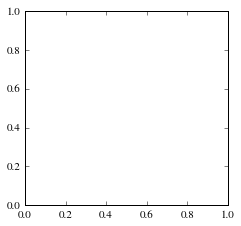

In [5]:
fig = pl.figure(figsize=(8,16))
x = [i*0.0005 for i in range(40)]
y = [i*0.0025 for i in range(40)]
xx,yy=np.meshgrid(x,y)

i = 1
for k in data_set:
    ax = fig.add_subplot(4,2,i)
    path = result[k]['path']
    ax.scatter([x[0] for x in path],[x[1] for x in path],s=10,c='r',marker='^',alpha=0.6)
    ax.scatter(xx,yy,s=2,c='k',marker='o',alpha=0.2)
    
    ax.text(0.02,0.13,'Steps=%s'%len(path),color='b')
    ax.set_title('mammography')
    ax.set_xlabel('p')
    ax.set_ylabel('q')
    ax.set_xlim(0,0.02)
    ax.set_ylim(0,0.1)
    i += 1

pl.tight_layout()